In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import plotly.express as px 
import plotly.figure_factory as ff
warnings.filterwarnings('ignore')

In [3]:
realestate = pd.read_csv('real_estate_clean.csv')
realestate.head()

,op_type,district,street,rooms,area,floor,total_floors,house_seria,house_type,condition,price,lat,lon
0,For rent,Purvciems,Dzelzavas 93,1,27.0,3.0,5.0,LT proj.,Brick-Panel,All amenities,250.0,56.955484,24.202139
1,For rent,Ziepniekkalns,Ozolciema 32,2,50.0,7.0,9.0,602.,Panel,All amenities,300.0,56.899798,24.098350
2,For sale,centrs,Ieroču 6,2,33.0,1.0,2.0,P. kara,Wood,Partial amenities,13500.0,56.975092,24.139884
3,For sale,Ķengarags,Maskavas 305,2,50.0,5.0,5.0,LT proj.,Panel,All amenities,34000.0,56.859788,24.308342
4,For rent,Teika,Zemgala gatve 80,3,76.0,3.0,12.0,Jaun.,Masonry,All amenities,490.0,56.977745,24.166042


In [72]:
realestate.tail()

,op_type,district,street,rooms,area,floor,total_floors,house_seria,house_type,condition,price,lat,lon
3939,For sale,centrs,Stabu 84,1,34.0,3.0,4.0,P. kara,Brick,Partial amenities,35000.0,56.950677,24.139756
3940,For rent,Āgenskalns,Elvīras 13a,1,30.0,4.0,5.0,LT proj.,Panel,All amenities,250.0,56.946360,24.053976
3941,For rent,Daugavgrīva,Birzes 32,1,32.0,2.0,5.0,103.,Brick-Panel,All amenities,180.0,57.037321,24.029662
3942,For sale,Purvciems,Vaidavas 2,2,43.0,5.0,5.0,Hrušč.,Brick,Partial amenities,44850.0,56.965118,24.176048
3943,For sale,centrs,Valdemāra 37,3,78.0,4.0,6.0,Jaun.,Masonry,All amenities,159600.0,56.958482,24.116859


In [73]:
realestate.shape

(3944, 13)

In [74]:
realestate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3944 entries, 0 to 3943
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   op_type       3944 non-null   object 
 1   district      3944 non-null   object 
 2   street        3944 non-null   object 
 3   rooms         3944 non-null   object 
 4   area          3944 non-null   float64
 5   floor         3944 non-null   float64
 6   total_floors  3944 non-null   float64
 7   house_seria   3944 non-null   object 
 8   house_type    3944 non-null   object 
 9   condition     3944 non-null   object 
 10  price         3944 non-null   float64
 11  lat           3944 non-null   float64
 12  lon           3944 non-null   float64
dtypes: float64(6), object(7)
memory usage: 400.7+ KB


In [75]:
realestate.dtypes

op_type          object
district         object
street           object
rooms            object
area            float64
floor           float64
total_floors    float64
house_seria      object
house_type       object
condition        object
price           float64
lat             float64
lon             float64
dtype: object

In [76]:
realestate.describe()

,area,floor,total_floors,price,lat,lon
count,3944.000000,3944.000000,3944.000000,3944.000000,3944.000000,3944.000000
mean,61.722051,3.598884,6.026116,58764.595335,56.900846,23.557130
std,35.527557,2.497548,3.539219,76532.496113,0.682900,8.203489
min,5.000000,1.000000,1.000000,5.000000,46.770384,-100.708194
25%,40.000000,2.000000,5.000000,450.000000,56.943100,24.095527
50%,53.000000,3.000000,5.000000,40000.000000,56.954831,24.127139
75%,75.000000,5.000000,7.000000,82125.000000,56.965062,24.173424
max,427.000000,24.000000,30.000000,830000.000000,59.347471,24.340866


In [77]:
realestate.groupby([ 'rooms', 'op_type'])[['price', 'total_floors']].mean()

price  total_floors
rooms op_type                              
1     Change     45000.000000      5.000000
      For rent     217.978533      5.753131
      For sale   34963.668845      5.418301
      Other         75.000000      3.500000
2     For rent     382.757455      6.097416
      For sale   66604.094798      5.709827
3     Change        60.000000      5.000000
      For rent     674.803448      7.455172
      For sale  111812.334981      6.355995
      Other      50990.000000      9.000000
4     For rent    1055.314815      5.407407
      For sale  165954.614545      6.360000
5     For rent    1320.700000      5.200000
      For sale  215864.701493      5.746269
6     For rent     965.000000      4.166667
      For sale  257194.117647      6.058824
Citi  For rent     260.000000      4.666667
      For sale  220957.636364      4.272727

In [78]:
realestate.groupby([ 'street', 'house_type']).mean()

area     floor  total_floors     price  \
street         house_type                                                 
13. janvāra 21 Brick-Panel  57.500000  2.000000          5.50     442.5   
               Panel        74.500000  5.000000          6.50     825.0   
               Panel-Brick  91.000000  2.000000          6.00  198000.0   
13. janvāra 33 Brick        82.000000  2.000000          4.00  124000.0   
               Masonry      73.000000  2.750000          4.25  160000.0   
...                               ...       ...           ...       ...   
Žagatu 20      Panel        63.500000  8.000000          9.00   69250.0   
Žagatu 20a     Brick-Panel  62.000000  1.000000          9.00   55000.0   
               Panel        58.666667  6.333333          9.00   39450.0   
Žagatu 22      Panel        46.000000  4.000000          5.00   44000.0   
Žagatu 24      Panel        30.000000  5.000000          5.00   30200.0   

                                  lat        lon  
street         house_type                         
13. janvāra 21 Brick-Panel  56.944378  24.110509  
               Panel        56.944378  24.110509  
               Panel-Brick  56.944378  24.110509  
13. janvāra 33 Brick        56.944520  24.109785  
               Masonry      56.944520  24.109785  
...                               ...        ...  
Žagatu 20      Panel        56.963659  24.187978  
Žagatu 20a     Brick-Panel  56.962958  24.187344  
               Panel        56.962958  24.187344  
Žagatu 22      Panel        56.963334  24.188798  
Žagatu 24      Panel        56.963457  24.190010  

[2758 rows x 6 columns]

In [79]:
realestate.groupby([  'house_type', 'condition']).mean()

area     floor  total_floors  \
house_type  condition                                               
Brick       All amenities       54.484547  3.132124      5.093264   
            Partial amenities   37.737143  2.285714      3.400000   
            Without amenities   44.000000  4.000000      5.000000   
Brick-Panel All amenities       62.149975  3.994987      6.987469   
            Partial amenities   42.650000  2.500000      3.750000   
            Without amenities  167.000000  1.000000      7.000000   
Masonry     All amenities       73.337441  3.365772      5.529362   
            Partial amenities   40.880000  2.750000      4.075000   
            Without amenities   57.340000  3.250000      4.250000   
Panel       All amenities       56.819710  4.301630      7.386775   
            Partial amenities   47.777778  3.111111      5.666667   
            Without amenities   75.000000  9.000000     10.000000   
Panel-Brick All amenities       69.687929  4.398990      7.676768   
            Partial amenities   65.500000  4.000000      5.000000   
Wood        All amenities       53.725234  1.588785      2.205607   
            Partial amenities   35.584286  1.542857      1.971429   
            Without amenities   36.800000  1.800000      2.000000   

                                      price        lat        lon  
house_type  condition                                              
Brick       All amenities      42285.084197  56.862810  23.273700  
            Partial amenities  20937.000000  56.962212  24.131261  
            Without amenities  39000.000000  56.963679  24.170617  
Brick-Panel All amenities      55669.774436  56.881307  23.733753  
            Partial amenities  13060.000000  57.005318  24.065321  
            Without amenities  19999.000000  56.954026  24.119133  
Masonry     All amenities      86472.787752  56.875733  22.972431  
            Partial amenities  19934.825000  56.960328  24.137923  
            Without amenities  96622.500000  56.968825  24.102367  
Panel       All amenities      47238.652174  56.935617  24.084587  
            Partial amenities  33310.555556  56.939916  24.150056  
            Without amenities  70000.000000  56.901548  24.092467  
Panel-Brick All amenities      72491.515152  56.951978  24.123451  
            Partial amenities  76687.500000  56.961371  24.213154  
Wood        All amenities      34962.682243  56.976305  24.055912  
            Partial amenities  14041.285714  56.962745  24.114897  
            Without amenities  11180.000000  56.974777  24.065000

In [80]:
cat_df = realestate.select_dtypes(include=['object'])

for col in cat_df.columns:
    freq = realestate[col].value_counts()
    freq = pd.DataFrame(freq)
    print(freq)

          op_type
For sale     2503
For rent     1435
Other           4
Change          2
                        district
centrs                      1316
Purvciems                    315
Āgenskalns                   220
Ziepniekkalns                193
Ķengarags                    189
Pļavnieki                    175
Imanta                       161
Teika                        118
Vecrīga                      106
Iļģuciems                    105
Mežciems                     104
Vecmīlgrāvis                  98
Zolitūde                      95
Jugla                         92
Sarkandaugava                 75
Šampēteris-Pleskodāle         69
Maskavas priekšpilsēta        67
Dzegužkalns                   49
Bolderāja                     46
Dārzciems                     43
Krasta r-ns                   36
Mežaparks                     28
Torņakalns                    27
Klīversala                    27
Grīziņkalns                   27
Daugavgrīva                   26
Ķīpsala            

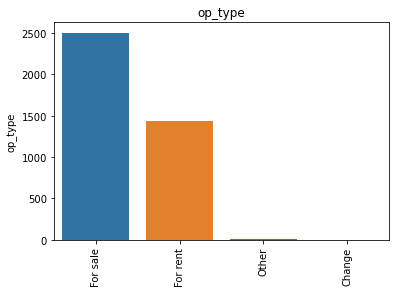

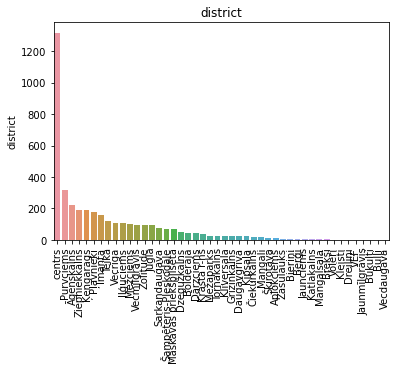

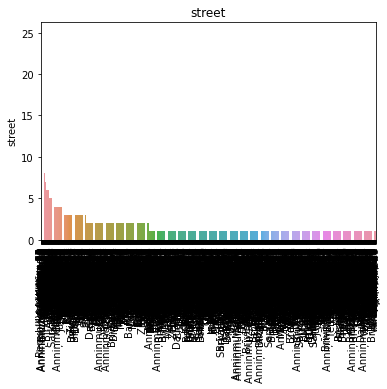

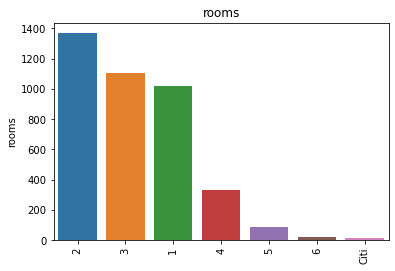

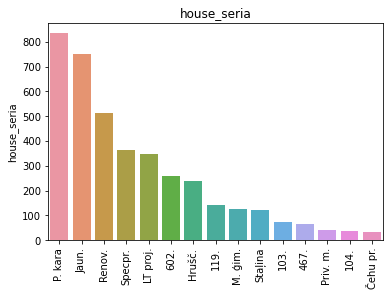

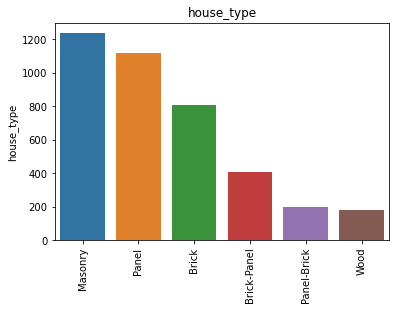

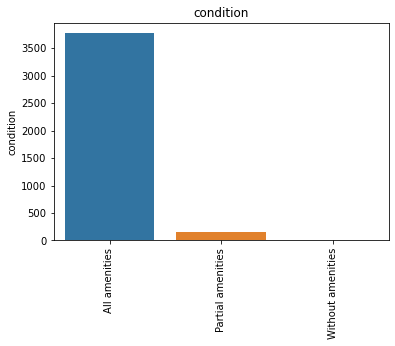

In [81]:
def countplots():
    for col in cat_df:
        cat = realestate[col].value_counts() # this hould make the adjust the scoop of to the vie
        chart = sns.barplot(cat.index , cat)
        chart.set_xticklabels(chart.get_xticklabels() , rotation = 90)

        plt.title(col)
        plt.show()
countplots()

In [5]:
fig = px.histogram(realestate, x="price", color="condition",
                   marginal="box",
                   hover_data=realestate.columns)
fig.show()

In [9]:
fig = px.scatter(realestate, x='area', y='floor', size='total_floors', color='condition', size_max=40, 
                 title='Bubble chart of area, and floors, and rooms')
fig.show()